# This code performs exploratory data analysis (EDA) and builds a predictive model
## for customer purchase amounts using a dataset of shopping trends.

## 1. Data Loading and Initial Exploration:
###    - Loads the shopping_trends.csv dataset into a pandas DataFrame.
###    - Displays the first few rows, data shape, info, and descriptive statistics.
###    - Checks for missing values and unique values in key columns.

## 2. Exploratory Data Analysis (EDA):
###    - Analyzes customer demographics (age, gender) and purchase amounts.
###    - Analyzes product categories and their impact on revenue.
###    - Identifies seasonal trends in purchase amounts.
###    - Explores the impact of discounts and promo codes on purchase amounts.
###    - Analyzes purchase amounts by payment method.

## 3. Data Visualization:
###    - Generates visualizations (bar charts, pie charts, histograms, heatmaps) to present insights
###      from the EDA.
###    - Visualizes the relationship between categories and seasons, payment method distribution,
###      purchase amounts, and correlations between age, purchase amounts, and review ratings.
###    - Uses pivot tables to summarize data and calculate percentages for specific insights.

## 4. Data Preprocessing for Modeling:
###    - Encodes categorical features (Gender, Location, Payment Method, Season, Category, Color, Size)
###      using Label Encoding to convert them into numerical representations.

## 5. Model Training:
###    - Splits the data into training and testing sets.
###    - Scales numerical features using StandardScaler.
###    - Uses PyCaret for automated model comparison.
###    - Trains a RandomForestRegressor model on the training data.

## 6. Model Evaluation:
###    - Evaluates the model's performance using feature importance, variance score, and residual error plots.
###    - Generates a bar chart visualizing feature importance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Customer Shopping/shopping_trends.csv")


In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.shape

(3900, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
df.sort_values(by="Customer ID")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
df['Season'].unique()


array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [ ]:
df['Location'].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

In [ ]:
df['Payment Method'].unique()

array(['Credit Card', 'Bank Transfer', 'Cash', 'PayPal', 'Venmo',
       'Debit Card'], dtype=object)

In [ ]:
#Customer Demographics:
df.groupby('Age')['Purchase Amount (USD)'].sum()

In [ ]:
df.groupby('Gender')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Gender,
Female,60.249199
Male,59.536199


In [ ]:
df.groupby('Gender')['Purchase Amount (USD)'].max()

,Purchase Amount (USD)
Gender,
Female,100
Male,100


In [ ]:
# Product and Category Analysis:

df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

,Purchase Amount (USD)
Category,
Clothing,104264
Accessories,74200
Footwear,36093
Outerwear,18524


In [ ]:
#Seasonal Trends:
df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False)


,Purchase Amount (USD)
Season,
Fall,60018
Spring,58679
Winter,58607
Summer,55777


In [ ]:
#Discount and Promo Code Analysis:

df.groupby(['Discount Applied','Promo Code Used'])['Purchase Amount (USD)'].sum()

,,Purchase Amount (USD)
Discount Applied,Promo Code Used,
No,No,133670
Yes,Yes,99411


In [ ]:
#Payment Method Analysis:
df.groupby('Payment Method')['Purchase Amount (USD)'].sum()

,Purchase Amount (USD)
Payment Method,
Bank Transfer,37123
Cash,38833
Credit Card,42567
Debit Card,37118
PayPal,37449
Venmo,39991


In [ ]:
!pip install matplotlib

In [ ]:
!pip install Seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

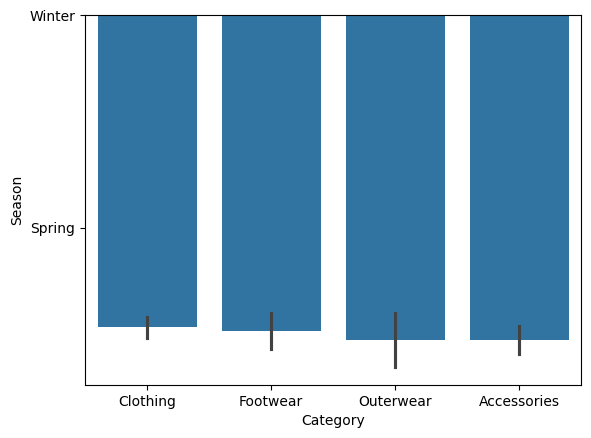

In [ ]:
#Bar Chart:
sns.barplot(x='Category', y='Season', data=df)
plt.show()

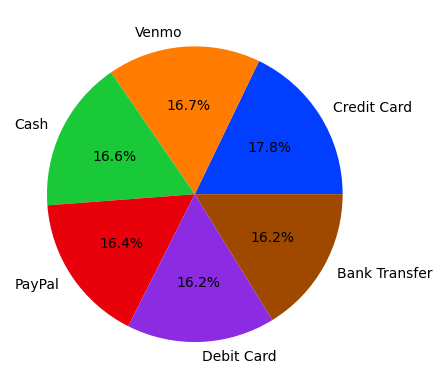

In [ ]:
#Pie Chart
palette_color = sns.color_palette('bright')
payment_method_count = df['Payment Method'].value_counts()
x = payment_method_count.index
plt.pie(payment_method_count.values ,labels = x ,colors = palette_color , data=df,autopct='%1.1f%%')
plt.show()

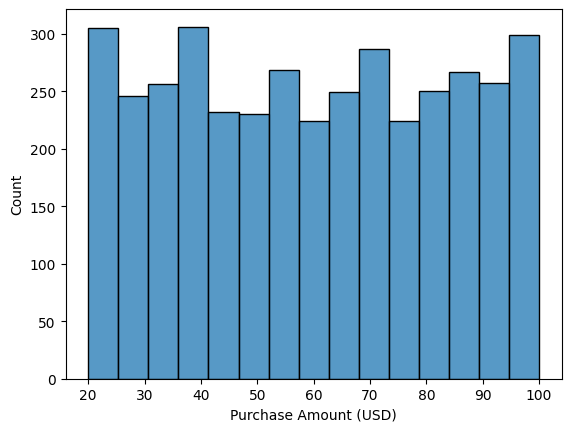

In [ ]:
#Histogram
sns.histplot(df['Purchase Amount (USD)'])
plt.show()

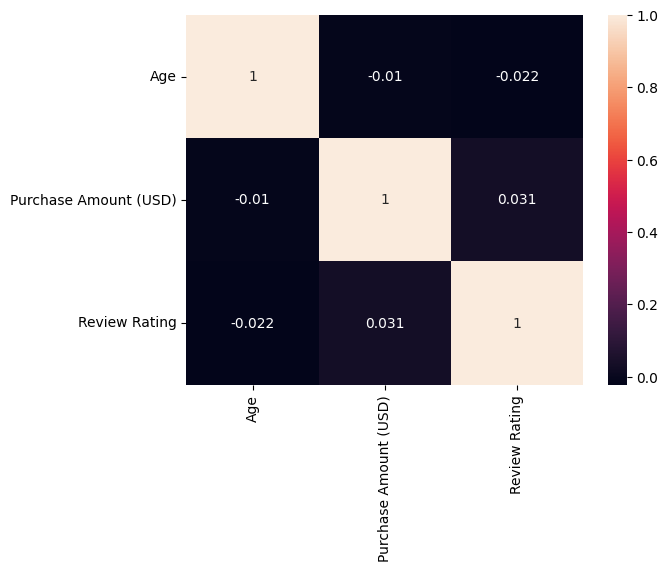

In [ ]:
#Heatmap Age, Purchase Amount, and Review Rating
sns.heatmap(df[['Age', 'Purchase Amount (USD)', 'Review Rating']].corr(), annot=True)
plt.show()

In [ ]:
#Aggregate Data for Insights
pd.pivot_table(df,index = 'Category',columns = 'Season', values= 'Purchase Amount (USD)' , aggfunc='sum')

Season,Fall,Spring,Summer,Winter
Category,,,,
Accessories,19874,17007,19028,18291
Clothing,26220,27692,23078,27274
Footwear,8665,9555,9393,8480
Outerwear,5259,4425,4278,4562


In [ ]:
#Calculate percentages for insights
df['Discount Applied'].value_counts(normalize=True)

,proportion
Discount Applied,
No,0.57
Yes,0.43


# Model Traning

In [ ]:
!pip install pycaret

## Customer Spending Prediction (Regression):
Predict Purchase Amount (USD) based on customer attributes (Age, Gender, Location, etc.).


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pycaret.classification import *
from sklearn.ensemble import RandomForestRegressor

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Payment Method'] = label_encoder.fit_transform(df['Payment Method'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Size'] = label_encoder.fit_transform(df['Size'])

In [ ]:
X = df[['Category','Size','Color','Season','Age','Location','Gender']]
y = df['Purchase Amount (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#fit model
object = StandardScaler()

X_train = object.fit_transform(X_train)
X_test = object.fit_transform(X_test)

In [ ]:
clf1 = setup(data=pd.DataFrame(X_train, columns=['Category','Size','Color','Season','Age','Location','Gender'], index=y_train.index), target=y_train)
best = compare_models()

In [ ]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, monotonic_cst=None,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Instead of using coef_, you can access feature importance using:
print('Feature Importance:', reg.feature_importances_)
print('Variance score: {}'.format(reg.score(X_train, y_train)))

Feature Importance: [0.08289176 0.08049714 0.21525857 0.0768151  0.26627832 0.24067486
 0.03758425]
Variance score: 0.8482893977248616


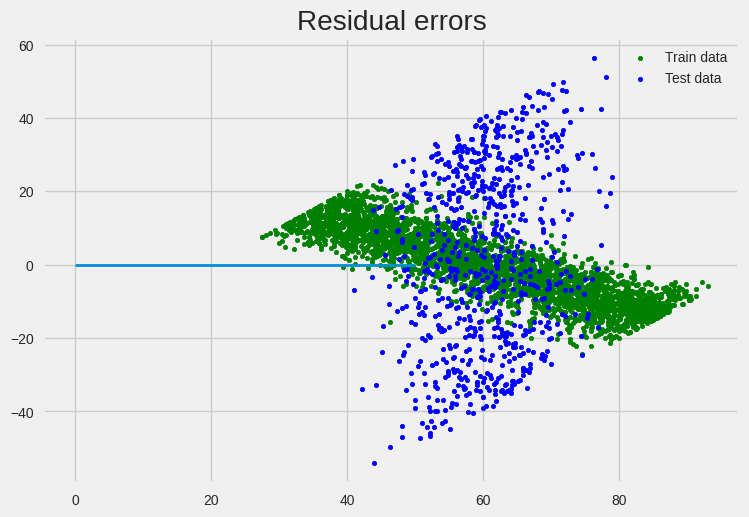

In [ ]:
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

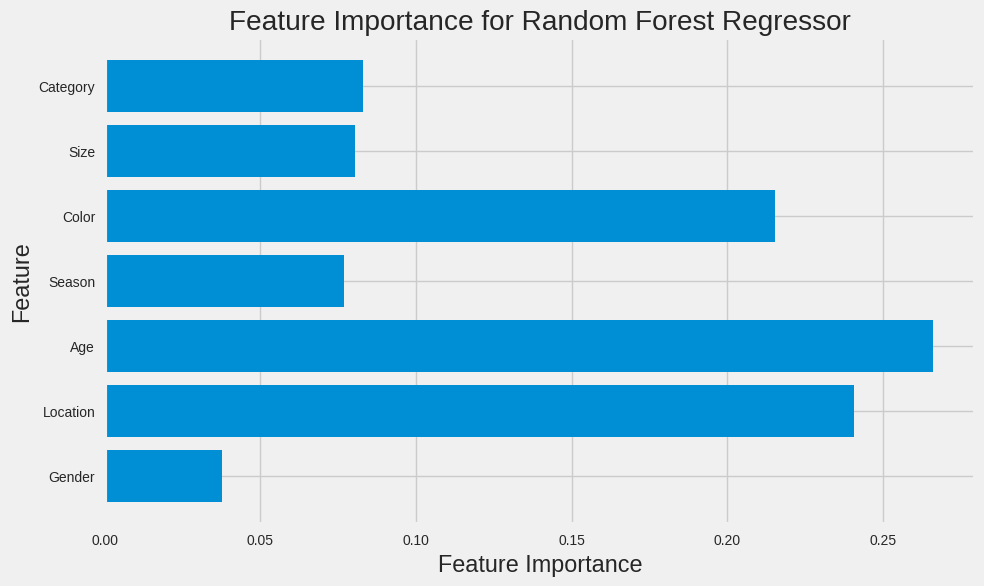

In [ ]:
# prompt: #Use a bar chart to visualize the most important features for tree-based models like Random Forest

import matplotlib.pyplot as plt

# Assuming 'reg' is your trained RandomForestRegressor model and X_train is your training features
feature_importances = reg.feature_importances_
feature_names = ['Category','Size','Color','Season','Age','Location','Gender'] # Replace with your actual feature names


# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest Regressor")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()